# Лабораторная работа №2
Страхов Павел
15 АС
Вариант №42

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                            precision_recall_curve, 
                            average_precision_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('C:\poker-hand-training-true_data.txt', sep=",", header=None, 
                   names = ["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5","class"])
data.head()

D:\Soft\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Soft\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,class
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
S1       25010 non-null int64
C1       25010 non-null int64
S2       25010 non-null int64
C2       25010 non-null int64
S3       25010 non-null int64
C3       25010 non-null int64
S4       25010 non-null int64
C4       25010 non-null int64
S5       25010 non-null int64
C5       25010 non-null int64
class    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
набор данных представляет собой 5 карт (колоды 52 карты) 4-х разных мастей.
S - масть карты
С - ранг карты (где 0 - туз, 1 - "двойка" ... 13 - "король")
№ - номер карты в руке (1 - 5)
class - получившаяся комбинация, где:
0 - ничего в руке
1 - одна пара, 2 карты равного ранга
2 - две пары, 2 пары по 2 карты равного ранга
3 - тройка (сет), три карты одного ранга
4 - стрит, 5 карт последовательных рангов разных мастей
5 - флеш, 5 карт одной масти в любом порядке рангов
6 - фул-хаус, пара и тройка любых мастей
7 - каре, 4 одноранговые карты
8 - стрит-флеш, 5 последовательных карт одной масти
9 - роял-флеш, 5 карт одной масти от "десятки" до "Туза"


# 2. Удалите дубликаты строк в наборе данных

In [3]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25008 entries, 0 to 25009
Data columns (total 11 columns):
S1       25008 non-null int64
C1       25008 non-null int64
S2       25008 non-null int64
C2       25008 non-null int64
S3       25008 non-null int64
C3       25008 non-null int64
S4       25008 non-null int64
C4       25008 non-null int64
S5       25008 non-null int64
C5       25008 non-null int64
class    25008 non-null int64
dtypes: int64(11)
memory usage: 2.3 MB


# 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

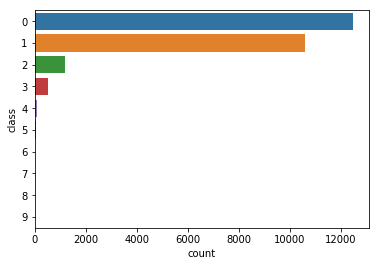

In [4]:
sns.countplot(data=data, y='class')
plt.show()

Соотношение количество элементов заметно отличается, поэтому будем считать, что классы несбалансированы. Будем использовать ROC-кривую, поскольку она дает адекватную оценку качества работы алгоритма, где классы несбалансированы и их размеры выборки отличаются друг от друга несущественно (не на порядок)

# 4. Выполните масштабирование количественных признаков

In [5]:
numerical_columns = [i for i in data.columns if data[i].dtype.name != 'object']
categorial_columns = [i for i in data.columns if data[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
categorial:  []


# 5.Выполните замену категориальных признаков

Категориальных признаков - нет.

# 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

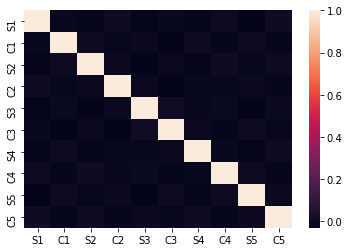

          S1        C1        S2        C2        S3        C3        S4  \
S1  1.000000 -0.010273 -0.021248  0.008290 -0.019683 -0.009980 -0.017255   
C1 -0.010273  1.000000  0.004413 -0.010951 -0.000288 -0.026273  0.004109   
S2 -0.021248  0.004413  1.000000 -0.002424 -0.029276 -0.005299 -0.020945   
C2  0.008290 -0.010951 -0.002424  1.000000 -0.005347 -0.024678 -0.008471   
S3 -0.019683 -0.000288 -0.029276 -0.005347  1.000000  0.017920 -0.013000   
C3 -0.009980 -0.026273 -0.005299 -0.024678  0.017920  1.000000 -0.003168   
S4 -0.017255  0.004109 -0.020945 -0.008471 -0.013000 -0.003168  1.000000   
C4  0.003847 -0.014369  0.012050 -0.013004  0.001849 -0.016310 -0.008766   
S5 -0.024137  0.004854 -0.011842  0.000607 -0.030291  0.003745 -0.018232   
C5  0.006715 -0.016983  0.005777 -0.016469 -0.001971 -0.010905  0.005265   

          C4        S5        C5  
S1  0.003847 -0.024137  0.006715  
C1 -0.014369  0.004854 -0.016983  
S2  0.012050 -0.011842  0.005777  
C2 -0.013004  0.000607 

In [6]:
data_corr = data.drop(['class'], axis=1).corr()
sns.heatmap(data_corr)
plt.show()
print(data_corr)

# 7 - пропущенных значений нет, задание не требует выполнения

# 8 (классификатор K ближайших соседей , бинарное решающее дерево)

In [7]:
# разделим полученные данные на данные для обучения и теста
X = np.array(data)
y = np.array(data['S1']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 123)

print(X_train.shape)
print(X_test.shape)

(16755, 11)
(8253, 11)


In [8]:
X = np.array(data)
y = np.array(data['class'])

In [9]:
# найдем оптимальный радиус для классификатора ближайших соседей

rnc = RadiusNeighborsClassifier(outlier_label=1)

params = {'radius': np.arange(4, 5, 0.1)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score, ' at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label=7, radius=best_radius)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score: 0.5856759176365264  at radius: 4.899999999999997
test score:  0.618684114867321


In [16]:
#найдем оптимальные глубину и количества учитываемых параметров для классификатора решающее дерево
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,10)), 'max_features': list(range(1,10))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 1.0 	 at features number: 8 	 at depth: 5
test score:  0.0


D:\Soft\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [17]:
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

In [18]:
class MyRadiusNeighborsClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, y_train):
        '''
        
        General description. 
        Determines the probability that a test instance matching a class.
        
        Algorithm. 
        We'll go through the zero radius to the double classifier radius
        with the elementary step(dr). If an instance lies along the:
        * Zero raduis+dr - corresponds 100%
        * Classifier raduis+dr - corresponds 50%
        * Double classifier raduis+dr and beyond it - corresponds 0%
        There are intermediate values of percents. Each step corresponds
        to its own percentage value. If predicted instance changes its 
        class, this instance belongs to the current radius and it is 
        assigned the appropriate percentage. 
        
        fit method built-in
        '''
        runs = 25
        dr = (2*self.radius/runs)    
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(y_test),7), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1, 2, 3, 4, 5, 6]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

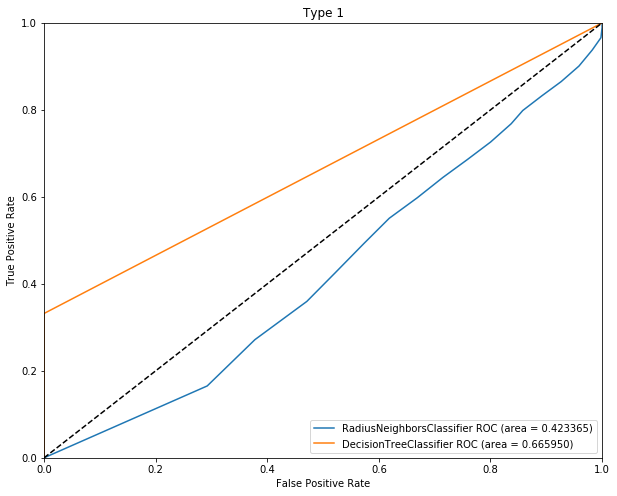

In [19]:
# ROC
plt.figure(figsize=(10,8))
mrnc = MyRadiusNeighborsClassifier(outlier_label=7, radius=best_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,1], probas_mrnc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,1], probas_dtc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Type 1')
plt.show()

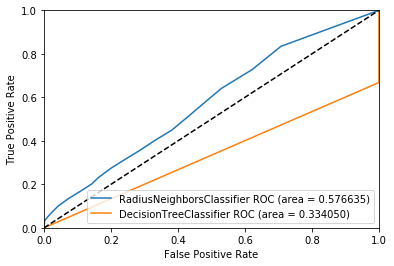

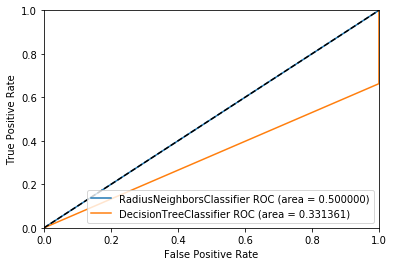

In [20]:
mrnc = MyRadiusNeighborsClassifier(outlier_label=3, radius=best_radius)
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,1], -probas_mrnc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,1], -probas_dtc0[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

mrnc = MyRadiusNeighborsClassifier(outlier_label=3, radius=best_radius)
probas_mrnc2 = mrnc.predict_proba(X_test, X_train, y_train)
tpr, fpr, thresholds = roc_curve(y_test[:,2], -probas_mrnc0[:,2])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 

dtc = DecisionTreeClassifier(max_depth=4, max_features=2)
probas_dtc2 = dtc.fit(X_train, y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(y_test[:,2], -probas_dtc0[:,2])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.show()

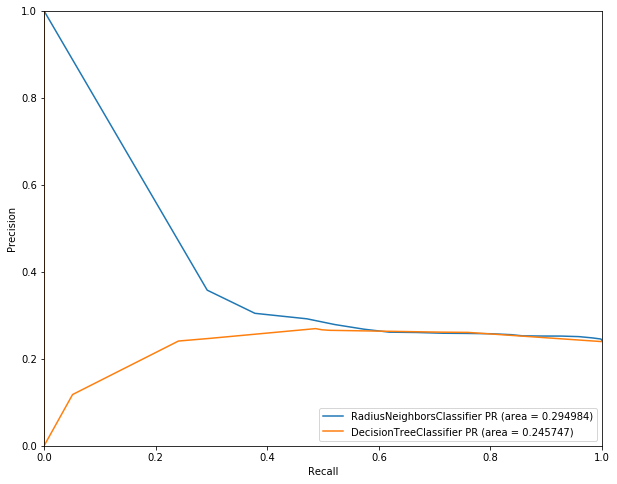

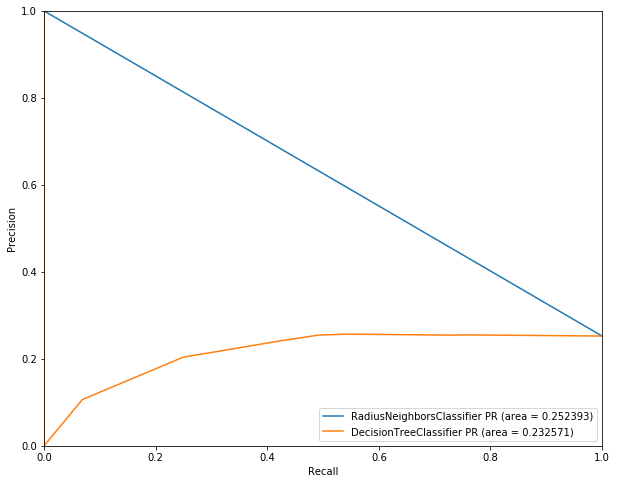

In [21]:
plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(y_test[:,1],probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,1], probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test[:,1],probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()

plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_mrnc1[:,2])
aps_mrnc1 = average_precision_score(y_test[:,2],probas_mrnc1[:,2])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test[:,2], probas_dtc1[:,2])
aps_dtc1 = average_precision_score(y_test[:,2],probas_dtc1[:,2])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.show()